In [115]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sp
import numpy as np
import seaborn as sns
from scipy.stats import linregress, sem
from statistics import mean, stdev, median 
from random import sample

In [116]:
os.listdir()

['.DS_Store',
 '14FEB20',
 '24JAN20',
 '.ipynb_checkpoints',
 '2_14_2020_ updated 09_2024_with MC weights.ipynb',
 '1_24_2020_ updated 09_2024_with MC weights.ipynb']

In [117]:
os.listdir('./')

['.DS_Store',
 '14FEB20',
 '24JAN20',
 '.ipynb_checkpoints',
 '2_14_2020_ updated 09_2024_with MC weights.ipynb',
 '1_24_2020_ updated 09_2024_with MC weights.ipynb']

In [118]:
os.listdir('./24JAN20')

['colony_areas_IL17AFxpt_01_24_2020.pdf',
 'res',
 '.DS_Store',
 'box and swarm plots Colony area_01_24_2020 IL17F_IL17AF.pdf',
 'Manual_coun_MC_weights_01_24_2020.xlsx',
 'COUNT.csv',
 'old',
 '_count_plot_IL17A_01_24_2020.pdf',
 'areas.csv.log',
 'areas.csv',
 'area_analysis_for_01_24_2020.xlsx',
 'colony_counts_1_24_2020_IL17A.xlsx']

In [119]:
folder = './24JAN20'

#### open counts and area files as pandas DFs

In [120]:
Areas = pd.read_csv(folder+'/areas.csv', index_col= 0) 
Areas = Areas.T
Areas.shape

(12, 10)

In [121]:
Areas

,0,1,2,3,4,5,6,7,8,9
0.5_Epo_Yes_IL17A_1_Stitched.0,3146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.5_Epo_Yes_IL17A_3_Stitched.0,2498.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.5_Epo_Yes_IL17A_3_Stitched.1,1413.0,2054.0,1010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.5_Epo_Yes_IL17A_3_Stitched.3,3148.0,3252.0,4130.0,3165.0,4343.0,3011.0,4197.0,837.0,395.0,13.0
0.5_Epo_No_IL17A_2_Stitched.2,2210.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.05_Epo_Yes_IL17A_1_Stitched.0,2476.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.5_Epo_Yes_IL17A_1_Stitched.2,2906.0,2844.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.5_Epo_No_IL17A_2_Stitched.3,6684.0,6683.0,6675.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.5_Epo_Yes_IL17A_2_Stitched.2,3235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.5_Epo_Yes_IL17A_2_Stitched.1,2595.0,2514.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
Counts = pd.read_csv(folder+'/COUNT.csv', index_col='NAME') #original csv file
Counts.shape

(64, 2)

In [123]:
Counts

,Unnamed: 0,COUNT
NAME,,
0.05_Epo_No_IL17A_1_Stitched.0,0,0
0.05_Epo_No_IL17A_1_Stitched.1,1,0
0.05_Epo_No_IL17A_1_Stitched.2,2,0
0.05_Epo_No_IL17A_1_Stitched.3,3,0
0.05_Epo_No_IL17A_2_Stitched.0,4,0
...,...,...
No_Epo_Yes_IL17A_1_Stitched.3,59,0
No_Epo_Yes_IL17A_2_Stitched.0,60,0
No_Epo_Yes_IL17A_2_Stitched.1,61,0


In [124]:
Counts.drop('Unnamed: 0', axis=1, inplace=True)

In [125]:
Counts.iloc[63,:]

COUNT    0
Name: No_Epo_Yes_IL17A_2_Stitched.3, dtype: int64

In [126]:
#Maixmal colony numbers:
Counts.COUNT.max()

10

In [127]:
#this was found in the following sample:
Counts[Counts.COUNT==19]

,COUNT
NAME,


#### Generate a joint DF for both counts and areas:

In [128]:
mergeDF = pd.concat([Counts, Areas], axis= 1)

In [129]:
mergeDF

,COUNT,0,1,2,3,4,5,6,7,8,9
0.05_Epo_No_IL17A_1_Stitched.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.05_Epo_No_IL17A_1_Stitched.1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.05_Epo_No_IL17A_1_Stitched.2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.05_Epo_No_IL17A_1_Stitched.3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.05_Epo_No_IL17A_2_Stitched.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
No_Epo_Yes_IL17A_1_Stitched.3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_Epo_Yes_IL17A_2_Stitched.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_Epo_Yes_IL17A_2_Stitched.1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_Epo_Yes_IL17A_2_Stitched.2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
mergeDF.shape

(64, 11)

In [131]:
#Find which fields had no colonies (accounting for difference in row numbers between Areas and Counts)

mergeDF[mergeDF.iloc[:, 1].isnull()].shape

(52, 11)

#### Use label to get sample name, Epo and IL17 concentration and replicate number

In [132]:
Counts.shape

(64, 1)

In [133]:
Counts['Label']=Counts.index

In [134]:
Counts['Label'][40:60]

NAME
0.5_Epo_Yes_IL17A_2_Stitched.0    0.5_Epo_Yes_IL17A_2_Stitched.0
0.5_Epo_Yes_IL17A_2_Stitched.1    0.5_Epo_Yes_IL17A_2_Stitched.1
0.5_Epo_Yes_IL17A_2_Stitched.2    0.5_Epo_Yes_IL17A_2_Stitched.2
0.5_Epo_Yes_IL17A_2_Stitched.3    0.5_Epo_Yes_IL17A_2_Stitched.3
0.5_Epo_Yes_IL17A_3_Stitched.0    0.5_Epo_Yes_IL17A_3_Stitched.0
0.5_Epo_Yes_IL17A_3_Stitched.1    0.5_Epo_Yes_IL17A_3_Stitched.1
0.5_Epo_Yes_IL17A_3_Stitched.2    0.5_Epo_Yes_IL17A_3_Stitched.2
0.5_Epo_Yes_IL17A_3_Stitched.3    0.5_Epo_Yes_IL17A_3_Stitched.3
No_Epo_No_IL17A_1_Stitched.0        No_Epo_No_IL17A_1_Stitched.0
No_Epo_No_IL17A_1_Stitched.1        No_Epo_No_IL17A_1_Stitched.1
No_Epo_No_IL17A_1_Stitched.2        No_Epo_No_IL17A_1_Stitched.2
No_Epo_No_IL17A_1_Stitched.3        No_Epo_No_IL17A_1_Stitched.3
No_Epo_No_IL17A_2_Stitched.0        No_Epo_No_IL17A_2_Stitched.0
No_Epo_No_IL17A_2_Stitched.1        No_Epo_No_IL17A_2_Stitched.1
No_Epo_No_IL17A_2_Stitched.2        No_Epo_No_IL17A_2_Stitched.2
No_Epo_No_IL17A_2_St

In [135]:
def get_Epo_conc(label):
    if 'No_Epo' in label:
        return 0
    elif '0.05' in label:
        return 0.05
    elif '0.5' in label:
        return 0.5

In [136]:
def get_IL17_cytokine(label):
    if 'Yes_IL17A' in label: 
        return 'IL17A'
    else:
        return 'None'

In [137]:
def get_scan(label):
    if '1st_scan' in label:
        return '1st'
    elif '2nd_scan' in label:
        return '2nd'

In [138]:
def get_quadrant(label):
    if '.0' in label:
        return '0'
    elif '.1' in label:
        return '1'
    elif '.2' in label:
        return '2'
    elif '.3' in label:
        return '3'    

In [139]:
def get_replicate(label):
    if '_1_' in label:
        return '1'
    elif '_2_' in label:
        return '2'
    elif '_3_' in label:
        return '3'
    elif '_4_' in label:
        return '4'

In [140]:
Counts['Epo_conc(U/ml)'] = Counts.Label.apply(get_Epo_conc)

In [141]:
Counts['IL17_cytokine'] = Counts.Label.apply(get_IL17_cytokine)

Counts['quadrant'] = Counts.Label.apply(get_quadrant) 
Counts['replicate'] = Counts.Label.apply(get_replicate)

In [142]:
Counts['replicate'].unique()

array(['1', '2', '3'], dtype=object)

In [143]:
Counts['Epo_conc(U/ml)'].unique()

array([0.05, 0.5 , 0.  ])

In [144]:
Counts['IL17_cytokine'].unique()

array(['None', 'IL17A'], dtype=object)

In [145]:
Counts

,COUNT,Label,Epo_conc(U/ml),IL17_cytokine,quadrant,replicate
NAME,,,,,,
0.05_Epo_No_IL17A_1_Stitched.0,0,0.05_Epo_No_IL17A_1_Stitched.0,0.05,None,0,1
0.05_Epo_No_IL17A_1_Stitched.1,0,0.05_Epo_No_IL17A_1_Stitched.1,0.05,None,0,1
0.05_Epo_No_IL17A_1_Stitched.2,0,0.05_Epo_No_IL17A_1_Stitched.2,0.05,None,0,1
0.05_Epo_No_IL17A_1_Stitched.3,0,0.05_Epo_No_IL17A_1_Stitched.3,0.05,None,0,1
0.05_Epo_No_IL17A_2_Stitched.0,0,0.05_Epo_No_IL17A_2_Stitched.0,0.05,None,0,2
...,...,...,...,...,...,...
No_Epo_Yes_IL17A_1_Stitched.3,0,No_Epo_Yes_IL17A_1_Stitched.3,0.00,IL17A,3,1
No_Epo_Yes_IL17A_2_Stitched.0,0,No_Epo_Yes_IL17A_2_Stitched.0,0.00,IL17A,0,2
No_Epo_Yes_IL17A_2_Stitched.1,0,No_Epo_Yes_IL17A_2_Stitched.1,0.00,IL17A,1,2


#### Sum up colony numbers for each scan of each replicate 

In [146]:
Counts.groupby(['IL17_cytokine','Epo_conc(U/ml)','replicate'])['COUNT'].agg(['count','sum', 'mean','std', 'min', 'max'])

count  sum  mean       std  min  max
IL17_cytokine Epo_conc(U/ml) replicate                                      
IL17A         0.00           1              4    0  0.00  0.000000    0    0
                             2              4    0  0.00  0.000000    0    0
              0.05           1              4    1  0.25  0.500000    0    1
                             2              4    0  0.00  0.000000    0    0
                             3              4    0  0.00  0.000000    0    0
              0.50           1              4    3  0.75  0.957427    0    2
                             2              4    3  0.75  0.957427    0    2
                             3              4   14  3.50  4.509250    0   10
None          0.00           1              4    0  0.00  0.000000    0    0
                             2              4    0  0.00  0.000000    0    0
              0.05           1              4    0  0.00  0.000000    0    0
                             2              4    0  0.00  0.000000    0    0
                             3              4    0  0.00  0.000000    0    0
              0.50           1              4    0  0.00  0.000000    0    0
                             2              4    5  1.25  1.258306    0    3
                             3              4    2  0.50  1.000000    0    2

In [147]:
repDF = Counts.groupby(['IL17_cytokine','Epo_conc(U/ml)','replicate'])\
['COUNT'].agg(['count', 'mean','std','sem'])

In [148]:
repDF1= repDF.reset_index()

#### Import plate weights

In [149]:
man = pd.read_excel(f'{folder}/Manual_coun_MC_weights_01_24_2020.xlsx')

In [150]:
man.columns

Index(['Sample', 'Replicate', 'Weight', 'methylcellulose weight', 'Epo Dose'], dtype='object')

In [151]:
man

,Sample,Replicate,Weight,methylcellulose weight,Epo Dose
0,Epo,1,5.4619,1.0135,0.00
1,Epo,2,5.4443,0.9959,0.00
2,Epo,1,5.3982,0.9498,0.05
3,Epo,2,5.4740,1.0256,0.05
4,Epo,3,5.5801,1.1317,0.05
5,Epo,1,5.4537,1.0053,0.50
6,Epo,2,5.4335,0.9851,0.50
7,Epo,3,5.6167,1.1683,0.50
8,IL17a,1,5.5786,1.1302,0.00
9,IL17a,2,5.6028,1.1544,0.00


In [152]:
man.columns

Index(['Sample', 'Replicate', 'Weight', 'methylcellulose weight', 'Epo Dose'], dtype='object')

In [153]:
man.loc[:7, 'Sample']='None'
man.loc[8:, 'Sample']='IL17A'

In [154]:
man

,Sample,Replicate,Weight,methylcellulose weight,Epo Dose
0,None,1,5.4619,1.0135,0.00
1,None,2,5.4443,0.9959,0.00
2,None,1,5.3982,0.9498,0.05
3,None,2,5.4740,1.0256,0.05
4,None,3,5.5801,1.1317,0.05
5,None,1,5.4537,1.0053,0.50
6,None,2,5.4335,0.9851,0.50
7,None,3,5.6167,1.1683,0.50
8,IL17A,1,5.5786,1.1302,0.00
9,IL17A,2,5.6028,1.1544,0.00


In [155]:
repDF1.dtypes, man.dtypes

(IL17_cytokine      object
 Epo_conc(U/ml)    float64
 replicate          object
 count               int64
 mean              float64
 std               float64
 sem               float64
 dtype: object,
 Sample                     object
 Replicate                   int64
 Weight                    float64
 methylcellulose weight    float64
 Epo Dose                  float64
 dtype: object)

In [156]:
repDF1.columns, man.columns

(Index(['IL17_cytokine', 'Epo_conc(U/ml)', 'replicate', 'count', 'mean', 'std',
        'sem'],
       dtype='object'),
 Index(['Sample', 'Replicate', 'Weight', 'methylcellulose weight', 'Epo Dose'], dtype='object'))

In [157]:
# adjust column names:
man.rename({'Sample':'IL17_cytokine', 'Epo Dose':'Epo_conc(U/ml)', 'Replicate':'replicate'},\
           axis=1, inplace=True)

In [158]:
man['replicate']= man['replicate'].apply(lambda x: str(x))

In [159]:
man.dtypes

IL17_cytokine              object
replicate                  object
Weight                    float64
methylcellulose weight    float64
Epo_conc(U/ml)            float64
dtype: object

In [160]:
repDF1.shape, man.shape

((16, 7), (16, 5))

In [161]:
man.drop('Weight', axis=1, inplace=True)

In [162]:
repDFm= repDF1.merge(man, on=['IL17_cytokine','Epo_conc(U/ml)', 'replicate' ], how='outer')

In [163]:
repDFm

,IL17_cytokine,Epo_conc(U/ml),replicate,count,mean,std,sem,methylcellulose weight
0,IL17A,0.00,1,4,0.00,0.000000,0.000000,1.1302
1,IL17A,0.00,2,4,0.00,0.000000,0.000000,1.1544
2,IL17A,0.05,1,4,0.25,0.500000,0.250000,1.4528
3,IL17A,0.05,2,4,0.00,0.000000,0.000000,1.0249
4,IL17A,0.05,3,4,0.00,0.000000,0.000000,1.1540
5,IL17A,0.50,1,4,0.75,0.957427,0.478714,1.0779
6,IL17A,0.50,2,4,0.75,0.957427,0.478714,1.0708
7,IL17A,0.50,3,4,3.50,4.509250,2.254625,0.9980
8,None,0.00,1,4,0.00,0.000000,0.000000,1.0135
9,None,0.00,2,4,0.00,0.000000,0.000000,0.9959


In [164]:
#Correct Counts based on weight:
repDFm.loc[:, 'colony_count']= repDFm.apply(lambda x: x['mean']* x['methylcellulose weight'], axis=1)

In [165]:
repDFm

,IL17_cytokine,Epo_conc(U/ml),replicate,count,mean,std,sem,methylcellulose weight,colony_count
0,IL17A,0.00,1,4,0.00,0.000000,0.000000,1.1302,0.000000
1,IL17A,0.00,2,4,0.00,0.000000,0.000000,1.1544,0.000000
2,IL17A,0.05,1,4,0.25,0.500000,0.250000,1.4528,0.363200
3,IL17A,0.05,2,4,0.00,0.000000,0.000000,1.0249,0.000000
4,IL17A,0.05,3,4,0.00,0.000000,0.000000,1.1540,0.000000
5,IL17A,0.50,1,4,0.75,0.957427,0.478714,1.0779,0.808425
6,IL17A,0.50,2,4,0.75,0.957427,0.478714,1.0708,0.803100
7,IL17A,0.50,3,4,3.50,4.509250,2.254625,0.9980,3.493000
8,None,0.00,1,4,0.00,0.000000,0.000000,1.0135,0.000000
9,None,0.00,2,4,0.00,0.000000,0.000000,0.9959,0.000000


In [166]:
repDFm= repDFm.fillna(0)
repDFm

,IL17_cytokine,Epo_conc(U/ml),replicate,count,mean,std,sem,methylcellulose weight,colony_count
0,IL17A,0.00,1,4,0.00,0.000000,0.000000,1.1302,0.000000
1,IL17A,0.00,2,4,0.00,0.000000,0.000000,1.1544,0.000000
2,IL17A,0.05,1,4,0.25,0.500000,0.250000,1.4528,0.363200
3,IL17A,0.05,2,4,0.00,0.000000,0.000000,1.0249,0.000000
4,IL17A,0.05,3,4,0.00,0.000000,0.000000,1.1540,0.000000
5,IL17A,0.50,1,4,0.75,0.957427,0.478714,1.0779,0.808425
6,IL17A,0.50,2,4,0.75,0.957427,0.478714,1.0708,0.803100
7,IL17A,0.50,3,4,3.50,4.509250,2.254625,0.9980,3.493000
8,None,0.00,1,4,0.00,0.000000,0.000000,1.0135,0.000000
9,None,0.00,2,4,0.00,0.000000,0.000000,0.9959,0.000000


In [167]:
summaryDFmeans= repDFm.groupby(['IL17_cytokine','Epo_conc(U/ml)'])['colony_count'].agg(['count','mean','std', 'sem'])

In [168]:
summaryDFmeans

count      mean       std       sem
IL17_cytokine Epo_conc(U/ml)                                     
IL17A         0.00                2  0.000000  0.000000  0.000000
              0.05                3  0.121067  0.209694  0.121067
              0.50                3  1.701508  1.551480  0.895747
None          0.00                2  0.000000  0.000000  0.000000
              0.05                3  0.000000  0.000000  0.000000
              0.50                3  0.605175  0.615957  0.355623

In [169]:
summaryDFreps= repDFm.groupby(['IL17_cytokine','Epo_conc(U/ml)', 'replicate'])['colony_count'].\
agg(['mean'])

In [170]:
summaryDFreps

mean
IL17_cytokine Epo_conc(U/ml) replicate          
IL17A         0.00           1          0.000000
                             2          0.000000
              0.05           1          0.363200
                             2          0.000000
                             3          0.000000
              0.50           1          0.808425
                             2          0.803100
                             3          3.493000
None          0.00           1          0.000000
                             2          0.000000
              0.05           1          0.000000
                             2          0.000000
                             3          0.000000
              0.50           1          0.000000
                             2          1.231375
                             3          0.584150

In [171]:
summaryDFmeans.reset_index().to_excel(folder+'/colony_counts_1_24_2020_IL17A.xlsx')

<Figure size 640x480 with 0 Axes>

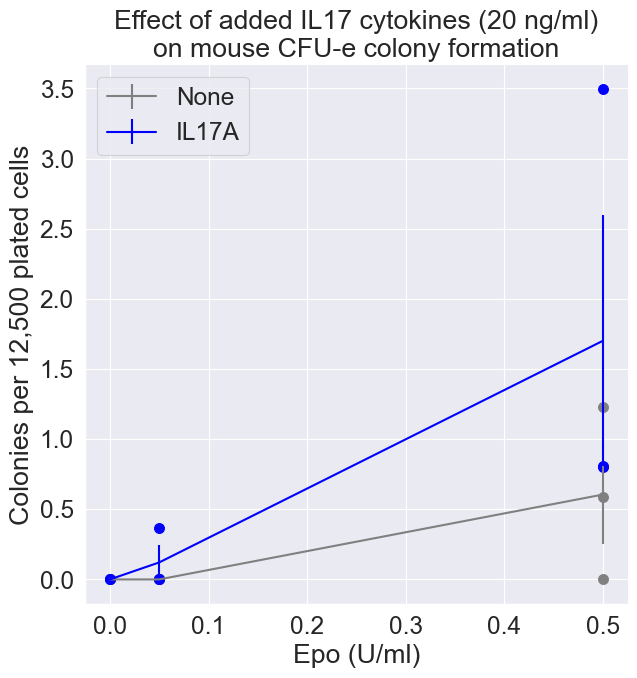

In [172]:
sns.set_context("paper", font_scale = 2)
sns.set_style('darkgrid')
sns.despine()

fig, ax = plt.subplots()
fig.set_size_inches([7,7])

colors = ['grey', 'blue', 'red']

cytokines = ['None', 'IL17A']
for i, cyt in enumerate(cytokines):
    repData= summaryDFreps.loc[cyt].reset_index()
    ys = repData['mean']
    xs = repData['Epo_conc(U/ml)']
    y = summaryDFmeans.loc[cyt]['mean']
    x = summaryDFmeans.loc[cyt].index.to_list()
    yerr = summaryDFmeans.loc[cyt]['sem']
   
    plt.errorbar(x, y, yerr, lw= 1.5, label = cyt, color = colors[i])
    plt.scatter(xs, ys,  s = 50, color = colors[i])
    plt.legend()
    plt.xlabel('Epo (U/ml)')
    plt.ylabel('Colonies per 12,500 plated cells')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.title('Effect of added IL17 cytokines (20 ng/ml)\non mouse CFU-e colony formation')
    
fig.savefig(folder+'/_count_plot_IL17A_01_24_2020.pdf')

    



#### Areas analysis

In [173]:

Areas

,0,1,2,3,4,5,6,7,8,9
0.5_Epo_Yes_IL17A_1_Stitched.0,3146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.5_Epo_Yes_IL17A_3_Stitched.0,2498.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.5_Epo_Yes_IL17A_3_Stitched.1,1413.0,2054.0,1010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.5_Epo_Yes_IL17A_3_Stitched.3,3148.0,3252.0,4130.0,3165.0,4343.0,3011.0,4197.0,837.0,395.0,13.0
0.5_Epo_No_IL17A_2_Stitched.2,2210.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.05_Epo_Yes_IL17A_1_Stitched.0,2476.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.5_Epo_Yes_IL17A_1_Stitched.2,2906.0,2844.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.5_Epo_No_IL17A_2_Stitched.3,6684.0,6683.0,6675.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.5_Epo_Yes_IL17A_2_Stitched.2,3235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.5_Epo_Yes_IL17A_2_Stitched.1,2595.0,2514.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [174]:
Areas['Label'] = Areas.index

In [175]:
Areas['Epo_conc(U/ml)'] = Areas.Label.apply(get_Epo_conc)
Areas['IL17_cytokine'] = Areas.Label.apply(get_IL17_cytokine)
Areas['quadrant'] = Areas.Label.apply(get_quadrant) 
Areas['replicate'] = Areas.Label.apply(get_replicate)

In [176]:
Areas.head()

,0,1,2,3,4,5,6,7,8,9,Label,Epo_conc(U/ml),IL17_cytokine,quadrant,replicate
0.5_Epo_Yes_IL17A_1_Stitched.0,3146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5_Epo_Yes_IL17A_1_Stitched.0,0.5,IL17A,0,1
0.5_Epo_Yes_IL17A_3_Stitched.0,2498.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5_Epo_Yes_IL17A_3_Stitched.0,0.5,IL17A,0,3
0.5_Epo_Yes_IL17A_3_Stitched.1,1413.0,2054.0,1010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5_Epo_Yes_IL17A_3_Stitched.1,0.5,IL17A,1,3
0.5_Epo_Yes_IL17A_3_Stitched.3,3148.0,3252.0,4130.0,3165.0,4343.0,3011.0,4197.0,837.0,395.0,13.0,0.5_Epo_Yes_IL17A_3_Stitched.3,0.5,IL17A,3,3
0.5_Epo_No_IL17A_2_Stitched.2,2210.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5_Epo_No_IL17A_2_Stitched.2,0.5,None,2,2


In [177]:
AreasH = Areas.set_index(['IL17_cytokine','Epo_conc(U/ml)','replicate']) # generate a hierarchical index


In [178]:
AreasH.sort_index
AreasH.index

MultiIndex([('IL17A',  0.5, '1'),
            ('IL17A',  0.5, '3'),
            ('IL17A',  0.5, '3'),
            ('IL17A',  0.5, '3'),
            ( 'None',  0.5, '2'),
            ('IL17A', 0.05, '1'),
            ('IL17A',  0.5, '1'),
            ( 'None',  0.5, '2'),
            ('IL17A',  0.5, '2'),
            ('IL17A',  0.5, '2'),
            ( 'None',  0.5, '3'),
            ( 'None',  0.5, '2')],
           names=['IL17_cytokine', 'Epo_conc(U/ml)', 'replicate'])

In [179]:
AreasH

0       1       2       3  \
IL17_cytokine Epo_conc(U/ml) replicate                                   
IL17A         0.50           1          3146.0     NaN     NaN     NaN   
                             3          2498.0     NaN     NaN     NaN   
                             3          1413.0  2054.0  1010.0     NaN   
                             3          3148.0  3252.0  4130.0  3165.0   
None          0.50           2          2210.0     NaN     NaN     NaN   
IL17A         0.05           1          2476.0     NaN     NaN     NaN   
              0.50           1          2906.0  2844.0     NaN     NaN   
None          0.50           2          6684.0  6683.0  6675.0     NaN   
IL17A         0.50           2          3235.0     NaN     NaN     NaN   
                             2          2595.0  2514.0     NaN     NaN   
None          0.50           3          3174.0  2229.0     NaN     NaN   
                             2          3048.0     NaN     NaN     NaN   

                                             4       5       6      7      8  \
IL17_cytokine Epo_conc(U/ml) replicate                                         
IL17A         0.50           1             NaN     NaN     NaN    NaN    NaN   
                             3             NaN     NaN     NaN    NaN    NaN   
                             3             NaN     NaN     NaN    NaN    NaN   
                             3          4343.0  3011.0  4197.0  837.0  395.0   
None          0.50           2             NaN     NaN     NaN    NaN    NaN   
IL17A         0.05           1             NaN     NaN     NaN    NaN    NaN   
              0.50           1             NaN     NaN     NaN    NaN    NaN   
None          0.50           2             NaN     NaN     NaN    NaN    NaN   
IL17A         0.50           2             NaN     NaN     NaN    NaN    NaN   
                             2             NaN     NaN     NaN    NaN    NaN   
None          0.50           3             NaN     NaN     NaN    NaN    NaN   
                             2             NaN     NaN     NaN    NaN    NaN   

                                           9                            Label  \
IL17_cytokine Epo_conc(U/ml) replicate                                          
IL17A         0.50           1           NaN   0.5_Epo_Yes_IL17A_1_Stitched.0   
                             3           NaN   0.5_Epo_Yes_IL17A_3_Stitched.0   
                             3           NaN   0.5_Epo_Yes_IL17A_3_Stitched.1   
                             3          13.0   0.5_Epo_Yes_IL17A_3_Stitched.3   
None          0.50           2           NaN    0.5_Epo_No_IL17A_2_Stitched.2   
IL17A         0.05           1           NaN  0.05_Epo_Yes_IL17A_1_Stitched.0   
              0.50           1           NaN   0.5_Epo_Yes_IL17A_1_Stitched.2   
None          0.50           2           NaN    0.5_Epo_No_IL17A_2_Stitched.3   
IL17A         0.50           2           NaN   0.5_Epo_Yes_IL17A_2_Stitched.2   
                             2           NaN   0.5_Epo_Yes_IL17A_2_Stitched.1   
None          0.50           3           NaN    0.5_Epo_No_IL17A_3_Stitched.3   
                             2           NaN    0.5_Epo_No_IL17A_2_Stitched.0   

                                       quadrant  
IL17_cytokine Epo_conc(U/ml) replicate           
IL17A         0.50           1                0  
                             3                0  
                             3                1  
                             3                3  
None          0.50           2                2  
IL17A         0.05           1                0  
              0.50           1                2  
None          0.50           2                3  
IL17A         0.50           2                2  
                             2                1  
None          0.50           3                3  
                             2                0

In [180]:
#rows = AreasH.loc[('None', 0.05, '1'),:].shape[0] #get number of rows for each cytokine/Epo_conc/rep combination
#rows

In [181]:
#Find number of rows for each replicate for Epo = 0.1, 0.5

cytokine = ['None', 'IL17A']
Epo = [0.0, 0.05, 0.5]
replicate = ['1', '2', '3']

rowN = []
sample = []
for cyt in cytokine:
    for e in Epo:
        for r in replicate:
            if (cyt, e, r) in AreasH.index:
                rows = AreasH.loc[(cyt, e, r),:].shape[0]
                sample.append((cyt, e, r))
                rowN.append(rows)

/var/folders/2v/cw87v1tx6rs6l0grk2tc35680000gn/T/ipykernel_71211/3114889927.py:12: PerformanceWarning: indexing past lexsort depth may impact performance.
  if (cyt, e, r) in AreasH.index:
/var/folders/2v/cw87v1tx6rs6l0grk2tc35680000gn/T/ipykernel_71211/3114889927.py:13: PerformanceWarning: indexing past lexsort depth may impact performance.
  rows = AreasH.loc[(cyt, e, r),:].shape[0]


In [182]:
# Now we have two list, one for each replicate name, the other for the number of rows of each replicate.
rowN, sample, len(rowN), len(sample)

([3, 1, 1, 2, 2, 3],
 [('None', 0.5, '2'),
  ('None', 0.5, '3'),
  ('IL17A', 0.05, '1'),
  ('IL17A', 0.5, '1'),
  ('IL17A', 0.5, '2'),
  ('IL17A', 0.5, '3')],
 6,
 6)

#### obtain a list of all areas from all regions, calculate their stats

In [183]:
AreasH

0       1       2       3  \
IL17_cytokine Epo_conc(U/ml) replicate                                   
IL17A         0.50           1          3146.0     NaN     NaN     NaN   
                             3          2498.0     NaN     NaN     NaN   
                             3          1413.0  2054.0  1010.0     NaN   
                             3          3148.0  3252.0  4130.0  3165.0   
None          0.50           2          2210.0     NaN     NaN     NaN   
IL17A         0.05           1          2476.0     NaN     NaN     NaN   
              0.50           1          2906.0  2844.0     NaN     NaN   
None          0.50           2          6684.0  6683.0  6675.0     NaN   
IL17A         0.50           2          3235.0     NaN     NaN     NaN   
                             2          2595.0  2514.0     NaN     NaN   
None          0.50           3          3174.0  2229.0     NaN     NaN   
                             2          3048.0     NaN     NaN     NaN   

                                             4       5       6      7      8  \
IL17_cytokine Epo_conc(U/ml) replicate                                         
IL17A         0.50           1             NaN     NaN     NaN    NaN    NaN   
                             3             NaN     NaN     NaN    NaN    NaN   
                             3             NaN     NaN     NaN    NaN    NaN   
                             3          4343.0  3011.0  4197.0  837.0  395.0   
None          0.50           2             NaN     NaN     NaN    NaN    NaN   
IL17A         0.05           1             NaN     NaN     NaN    NaN    NaN   
              0.50           1             NaN     NaN     NaN    NaN    NaN   
None          0.50           2             NaN     NaN     NaN    NaN    NaN   
IL17A         0.50           2             NaN     NaN     NaN    NaN    NaN   
                             2             NaN     NaN     NaN    NaN    NaN   
None          0.50           3             NaN     NaN     NaN    NaN    NaN   
                             2             NaN     NaN     NaN    NaN    NaN   

                                           9                            Label  \
IL17_cytokine Epo_conc(U/ml) replicate                                          
IL17A         0.50           1           NaN   0.5_Epo_Yes_IL17A_1_Stitched.0   
                             3           NaN   0.5_Epo_Yes_IL17A_3_Stitched.0   
                             3           NaN   0.5_Epo_Yes_IL17A_3_Stitched.1   
                             3          13.0   0.5_Epo_Yes_IL17A_3_Stitched.3   
None          0.50           2           NaN    0.5_Epo_No_IL17A_2_Stitched.2   
IL17A         0.05           1           NaN  0.05_Epo_Yes_IL17A_1_Stitched.0   
              0.50           1           NaN   0.5_Epo_Yes_IL17A_1_Stitched.2   
None          0.50           2           NaN    0.5_Epo_No_IL17A_2_Stitched.3   
IL17A         0.50           2           NaN   0.5_Epo_Yes_IL17A_2_Stitched.2   
                             2           NaN   0.5_Epo_Yes_IL17A_2_Stitched.1   
None          0.50           3           NaN    0.5_Epo_No_IL17A_3_Stitched.3   
                             2           NaN    0.5_Epo_No_IL17A_2_Stitched.0   

                                       quadrant  
IL17_cytokine Epo_conc(U/ml) replicate           
IL17A         0.50           1                0  
                             3                0  
                             3                1  
                             3                3  
None          0.50           2                2  
IL17A         0.05           1                0  
              0.50           1                2  
None          0.50           2                3  
IL17A         0.50           2                2  
                             2                1  
None          0.50           3                3  
                             2                0

In [184]:
AreasH = AreasH.drop(['Label', 'quadrant'], axis = 1)

In [185]:
AreasH.loc[sample[0],:].iloc[0,:].dropna().to_list()

/var/folders/2v/cw87v1tx6rs6l0grk2tc35680000gn/T/ipykernel_71211/3675073361.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  AreasH.loc[sample[0],:].iloc[0,:].dropna().to_list()


[2210.0]

#### There are very few colonies in each replicate, so add up all repliates and treat as one group.

In [186]:
AreasH1 = Areas.set_index(['IL17_cytokine','Epo_conc(U/ml)'])


In [187]:
AreasH1.sort_index
AreasH1.index

MultiIndex([('IL17A',  0.5),
            ('IL17A',  0.5),
            ('IL17A',  0.5),
            ('IL17A',  0.5),
            ( 'None',  0.5),
            ('IL17A', 0.05),
            ('IL17A',  0.5),
            ( 'None',  0.5),
            ('IL17A',  0.5),
            ('IL17A',  0.5),
            ( 'None',  0.5),
            ( 'None',  0.5)],
           names=['IL17_cytokine', 'Epo_conc(U/ml)'])

In [188]:
#rows = AreasH1.loc[('None', 0.05),:].shape[0]
#rows

In [189]:
#Find number of rows for each replicate for Epo = 0.1, 0.5

cytokine = ['None', 'IL17A']
Epo = [0.0, 0.05, 0.5]

rowN = []
sample = []
for cyt in cytokine:
    for e in Epo:
        if (cyt, e) in AreasH1.index:
            rows = AreasH1.loc[(cyt, e),:].shape[0]
            sample.append((cyt, e))
            rowN.append(rows)

/var/folders/2v/cw87v1tx6rs6l0grk2tc35680000gn/T/ipykernel_71211/177285466.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  if (cyt, e) in AreasH1.index:
/var/folders/2v/cw87v1tx6rs6l0grk2tc35680000gn/T/ipykernel_71211/177285466.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  rows = AreasH1.loc[(cyt, e),:].shape[0]


In [190]:
# Now we have two list, one for each replicate name, the other for the number of rows of each replicate.
rowN, sample, len(rowN), len(sample)

([4, 1, 7], [('None', 0.5), ('IL17A', 0.05), ('IL17A', 0.5)], 3, 3)

#### obtain a list of all areas from all regions, calculate their stats

In [191]:
AreasH1.head(3)

0       1       2   3   4   5   6   7   8  \
IL17_cytokine Epo_conc(U/ml)                                                   
IL17A         0.5             3146.0     NaN     NaN NaN NaN NaN NaN NaN NaN   
              0.5             2498.0     NaN     NaN NaN NaN NaN NaN NaN NaN   
              0.5             1413.0  2054.0  1010.0 NaN NaN NaN NaN NaN NaN   

                               9                           Label quadrant  \
IL17_cytokine Epo_conc(U/ml)                                                
IL17A         0.5            NaN  0.5_Epo_Yes_IL17A_1_Stitched.0        0   
              0.5            NaN  0.5_Epo_Yes_IL17A_3_Stitched.0        0   
              0.5            NaN  0.5_Epo_Yes_IL17A_3_Stitched.1        1   

                             replicate  
IL17_cytokine Epo_conc(U/ml)            
IL17A         0.5                    1  
              0.5                    3  
              0.5                    3

In [192]:
AreasH1 = AreasH1.drop(['Label', 'quadrant', 'replicate'], axis = 1)

In [193]:
#AreasH1.loc[('None', 0.05), :] #obtaining all rows from a single sample

In [194]:
AreasH1.loc[('None', 0.5), :].iloc[0,:]  #obtaining the colonies from a single row

/var/folders/2v/cw87v1tx6rs6l0grk2tc35680000gn/T/ipykernel_71211/3611343637.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  AreasH1.loc[('None', 0.5), :].iloc[0,:]  #obtaining the colonies from a single row


0    2210.0
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
Name: (None, 0.5), dtype: float64

In [195]:
AreasH1.loc[sample[0],:].iloc[0,:].dropna().to_list()

/var/folders/2v/cw87v1tx6rs6l0grk2tc35680000gn/T/ipykernel_71211/1111916550.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  AreasH1.loc[sample[0],:].iloc[0,:].dropna().to_list()


[2210.0]

In [196]:
AllList = []  # list of colony-areas-list for each sample
for j,s in enumerate(sample):
    slist = [] # list of colony-areas-list for each sample
    for i in range(rowN[j]):
        jlist = AreasH1.loc[sample[j],:].iloc[i,:].dropna().to_list() # list of colony areas in each row
        slist.extend(jlist)
    AllList.append(slist)

/var/folders/2v/cw87v1tx6rs6l0grk2tc35680000gn/T/ipykernel_71211/2399184242.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  jlist = AreasH1.loc[sample[j],:].iloc[i,:].dropna().to_list() # list of colony areas in each row


In [197]:
print(AllList), len(AllList)

[[2210.0, 6684.0, 6683.0, 6675.0, 3174.0, 2229.0, 3048.0], [2476.0], [3146.0, 2498.0, 1413.0, 2054.0, 1010.0, 3148.0, 3252.0, 4130.0, 3165.0, 4343.0, 3011.0, 4197.0, 837.0, 395.0, 13.0, 2906.0, 2844.0, 3235.0, 2595.0, 2514.0]]


(None, 3)

In [198]:
areaDF = pd.DataFrame()
areaDF['sample'] = sample
areaDF['colony_areas'] = AllList
areaDF

,sample,colony_areas
0,"(None, 0.5)","[2210.0, 6684.0, 6683.0, 6675.0, 3174.0, 2229...."
1,"(IL17A, 0.05)",[2476.0]
2,"(IL17A, 0.5)","[3146.0, 2498.0, 1413.0, 2054.0, 1010.0, 3148...."


#### Add Area stats to Results DF

In [199]:
areaDF['mean_colony_area'] = areaDF.colony_areas.apply(lambda x: round(mean(x),2))
#areaDF['colony_area_std'] = areaDF.colony_areas.apply(lambda x: round(stdev(x),2))
areaDF['colony_area_sem'] = areaDF.colony_areas.apply(lambda x: round(sem(x),2))
areaDF['colony_area_min'] = areaDF.colony_areas.apply(lambda x: round(min(x),2))
areaDF['colony_area_max'] = areaDF.colony_areas.apply(lambda x: round(max(x),2))
areaDF['colony_area_median']= areaDF.colony_areas.apply(lambda x: round(median(x),2))


/Users/rui/miniconda3/envs/mac.231213/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rui/miniconda3/envs/mac.231213/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [200]:
areaDF

,sample,colony_areas,mean_colony_area,colony_area_sem,colony_area_min,colony_area_max,colony_area_median
0,"(None, 0.5)","[2210.0, 6684.0, 6683.0, 6675.0, 3174.0, 2229....",4386.14,822.94,2210.0,6684.0,3174.0
1,"(IL17A, 0.05)",[2476.0],2476.00,NaN,2476.0,2476.0,2476.0
2,"(IL17A, 0.5)","[3146.0, 2498.0, 1413.0, 2054.0, 1010.0, 3148....",2535.30,275.44,13.0,4343.0,2875.0


#### Filter small size objects out

In [201]:
# count all objects:
areaDF['raw_count'] = areaDF['colony_areas'].apply(lambda x: len(x))

In [202]:
areaDF

,sample,colony_areas,mean_colony_area,colony_area_sem,colony_area_min,colony_area_max,colony_area_median,raw_count
0,"(None, 0.5)","[2210.0, 6684.0, 6683.0, 6675.0, 3174.0, 2229....",4386.14,822.94,2210.0,6684.0,3174.0,7
1,"(IL17A, 0.05)",[2476.0],2476.00,NaN,2476.0,2476.0,2476.0,1
2,"(IL17A, 0.5)","[3146.0, 2498.0, 1413.0, 2054.0, 1010.0, 3148....",2535.30,275.44,13.0,4343.0,2875.0,20


In [203]:
areaDF['filtered_colony_areas>1000'] = areaDF['colony_areas'].apply(lambda x: [c for c in x if c>1000])
areaDF['filtered_count(>1000)'] = areaDF['filtered_colony_areas>1000'].apply(lambda x: len(x))

In [204]:
areaDF['filtered_colony_areas>500'] = areaDF['colony_areas'].apply(lambda x: [c for c in x if c>500])
areaDF['filtered_count>500'] = areaDF['filtered_colony_areas>500'].apply(lambda x: len(x))

In [205]:
areaDF

,sample,colony_areas,mean_colony_area,colony_area_sem,colony_area_min,colony_area_max,colony_area_median,raw_count,filtered_colony_areas>1000,filtered_count(>1000),filtered_colony_areas>500,filtered_count>500
0,"(None, 0.5)","[2210.0, 6684.0, 6683.0, 6675.0, 3174.0, 2229....",4386.14,822.94,2210.0,6684.0,3174.0,7,"[2210.0, 6684.0, 6683.0, 6675.0, 3174.0, 2229....",7,"[2210.0, 6684.0, 6683.0, 6675.0, 3174.0, 2229....",7
1,"(IL17A, 0.05)",[2476.0],2476.00,NaN,2476.0,2476.0,2476.0,1,[2476.0],1,[2476.0],1
2,"(IL17A, 0.5)","[3146.0, 2498.0, 1413.0, 2054.0, 1010.0, 3148....",2535.30,275.44,13.0,4343.0,2875.0,20,"[3146.0, 2498.0, 1413.0, 2054.0, 1010.0, 3148....",17,"[3146.0, 2498.0, 1413.0, 2054.0, 1010.0, 3148....",18


In [206]:
areaDF['filtered_colony_areas>1500'] = areaDF['colony_areas'].apply(lambda x: [c for c in x if c>1500])
areaDF['filtered_count(>1500)'] = areaDF['filtered_colony_areas>1500'].apply(lambda x: len(x))

In [207]:
areaDF

,sample,colony_areas,mean_colony_area,colony_area_sem,colony_area_min,colony_area_max,colony_area_median,raw_count,filtered_colony_areas>1000,filtered_count(>1000),filtered_colony_areas>500,filtered_count>500,filtered_colony_areas>1500,filtered_count(>1500)
0,"(None, 0.5)","[2210.0, 6684.0, 6683.0, 6675.0, 3174.0, 2229....",4386.14,822.94,2210.0,6684.0,3174.0,7,"[2210.0, 6684.0, 6683.0, 6675.0, 3174.0, 2229....",7,"[2210.0, 6684.0, 6683.0, 6675.0, 3174.0, 2229....",7,"[2210.0, 6684.0, 6683.0, 6675.0, 3174.0, 2229....",7
1,"(IL17A, 0.05)",[2476.0],2476.00,NaN,2476.0,2476.0,2476.0,1,[2476.0],1,[2476.0],1,[2476.0],1
2,"(IL17A, 0.5)","[3146.0, 2498.0, 1413.0, 2054.0, 1010.0, 3148....",2535.30,275.44,13.0,4343.0,2875.0,20,"[3146.0, 2498.0, 1413.0, 2054.0, 1010.0, 3148....",17,"[3146.0, 2498.0, 1413.0, 2054.0, 1010.0, 3148....",18,"[3146.0, 2498.0, 2054.0, 3148.0, 3252.0, 4130....",15


In [208]:
areaDF['mean_colony_area>500'] = areaDF['filtered_colony_areas>500'].apply(lambda x: round(mean(x),2))
#areaDF['colony_area_std>500'] = areaDF['filtered_colony_areas>500'].apply(lambda x: round(stdev(x),2))
areaDF['colony_area_sem>500'] = areaDF['filtered_colony_areas>500'].apply(lambda x: round(sem(x),2))
areaDF['colony_area_median>500']= areaDF['filtered_colony_areas>500'].apply(lambda x: round(median(x),2))

/Users/rui/miniconda3/envs/mac.231213/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rui/miniconda3/envs/mac.231213/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [209]:
areaDF

,sample,colony_areas,mean_colony_area,colony_area_sem,colony_area_min,colony_area_max,colony_area_median,raw_count,filtered_colony_areas>1000,filtered_count(>1000),filtered_colony_areas>500,filtered_count>500,filtered_colony_areas>1500,filtered_count(>1500),mean_colony_area>500,colony_area_sem>500,colony_area_median>500
0,"(None, 0.5)","[2210.0, 6684.0, 6683.0, 6675.0, 3174.0, 2229....",4386.14,822.94,2210.0,6684.0,3174.0,7,"[2210.0, 6684.0, 6683.0, 6675.0, 3174.0, 2229....",7,"[2210.0, 6684.0, 6683.0, 6675.0, 3174.0, 2229....",7,"[2210.0, 6684.0, 6683.0, 6675.0, 3174.0, 2229....",7,4386.14,822.94,3174.0
1,"(IL17A, 0.05)",[2476.0],2476.00,NaN,2476.0,2476.0,2476.0,1,[2476.0],1,[2476.0],1,[2476.0],1,2476.00,NaN,2476.0
2,"(IL17A, 0.5)","[3146.0, 2498.0, 1413.0, 2054.0, 1010.0, 3148....",2535.30,275.44,13.0,4343.0,2875.0,20,"[3146.0, 2498.0, 1413.0, 2054.0, 1010.0, 3148....",17,"[3146.0, 2498.0, 1413.0, 2054.0, 1010.0, 3148....",18,"[3146.0, 2498.0, 2054.0, 3148.0, 3252.0, 4130....",15,2794.33,233.47,2958.5


In [210]:
areaDF.to_excel(folder+'/area_analysis_for_01_24_2020.xlsx')

In [211]:
areaDF.iloc[0,1]

[2210.0, 6684.0, 6683.0, 6675.0, 3174.0, 2229.0, 3048.0]

In [212]:
areaDF.loc[:, 'sample'].to_list()

[('None', 0.5), ('IL17A', 0.05), ('IL17A', 0.5)]

In [213]:
len(areaDF.loc[:, 'filtered_colony_areas>500'].to_list()[3])

IndexError: list index out of range

In [ ]:
areaLists = areaDF.loc[:, 'filtered_colony_areas>500'].to_list()

In [ ]:
sns.set_style("darkgrid")
sns.set_context("paper", font_scale = 2)
IL17cyt = {'None': '', 'IL17A':'IL17A (20ng/ml) +', 'IL17F':'IL17F (20ng/ml) +'}
n=3
nrows = 3
fig, axs = plt.subplots(nrows, ncols = n, figsize = (18, nrows*3), sharex=True, sharey = True)
n_bins = 50
samples = areaDF.loc[:, 'sample'].to_list()
areaLists = areaDF.loc[:, 'filtered_colony_areas>500'].to_list()
colony_numbers = areaDF.loc[:, 'filtered_count>500'].to_list()
median_colony_area = areaDF.loc[:, 'colony_area_median>500'].to_list()
median_colony_area = [int(a) for a in median_colony_area]
colors = ['grey', 'blue', 'red']
for i,s in enumerate(samples):
    axs[i//n, i%n].hist(areaLists[i], alpha = 1, bins = n_bins, color = colors[i//3])
    axs[i//n, i%n].set_title(IL17cyt[s[0]] +' Epo ('+str(s[1])+' U/ml)'+\
            '\nn = '+str(colony_numbers[i])+'\nmedian area = '
                       +str(median_colony_area[i]))
    
    axs[1, 1].set_xlabel('Colony area(pixels)')
    axs[0, 0].set_ylabel('Count')
fig.suptitle('Distribution of CFU-e-colony areas in response to Epo +/- added IL17 cytokines', y=1.05)
plt.subplots_adjust(hspace=0.8)
fig.savefig(folder+'/colony_areas_IL17AFxpt_01_24_2020.pdf')

In [ ]:
areaDF.loc[areaDF['sample'].isin([('None', 0.5), ('IL17A', 0.5)])]

In [ ]:
plotDF= areaDF.loc[areaDF['sample'].isin([('None', 0.5), ('IL17A', 0.5), ('IL17F', 0.5)])]
samples = plotDF.loc[:, 'sample'].to_list()
areaLists = plotDF.loc[:, 'filtered_colony_areas>500'].to_list()

fig, ax = plt.subplots(1, 2, figsize= (10, 5), sharex=True)

plt.subplot(1,2,1)
g = sns.boxplot(data=areaLists)
g.set_xticklabels(labels= samples, rotation=90)
plt.subplot(1,2,2)
g = sns.swarmplot(data=areaLists, edgecolor = 'gray')
g.set_xticklabels(labels= samples, rotation=90)
g.set_ylim(0,6000)

#fig.suptitle('Colony area v paraformaldehyde concentration', y = 1)
fig.supylabel('colony areas (pixels)', )

plt.tight_layout()
plt.savefig(folder+'/box and swarm plots Colony area_01_24_2020 IL17F_IL17AF.pdf')


In [ ]:
areaDF

#### IGNORE BELOW THIS LINE

In [ ]:
pooledAdictL= {}
pooledAdictL['WT']= WTareaL
pooledAdictL['E2F4-/-'] = KOareaL

In [ ]:
pooledAL= pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in pooledAdictL.items() ]))

In [ ]:
pooledAL

In [ ]:
labels = ['WT', 'E2F4-/-']
sns.set_style("white")

sns.set_context("paper", font_scale = 2)
custom_palette = ["pink","paleturquoise","thistle","navajowhite", 'lightgreen']

plt.figure(figsize=(8, 5))
fig, ax = plt.subplots(figsize=(8, 5))

sns.violinplot(data= pooledAL, palette = custom_palette, linewidth = 1.5,inner = 'quartiles')
sns.swarmplot(data=pooledAL, color = 'black')

In [ ]:
labels = ['WT', 'E2F4-/-']
sns.set_style("white")

sns.set_context("paper", font_scale = 2)
custom_palette = ["pink","paleturquoise","thistle","navajowhite", 'lightgreen']

plt.figure(figsize=(8, 5))
fig, ax = plt.subplots(figsize=(8, 5))

sns.violinplot(data= pooledAL, palette = custom_palette, linewidth = 1.5,inner = 'quartiles')

In [ ]:
WTareaS = [a for a in WTareaJoint if  a<3000]
KOareaS = [a for a in KOareaJoint if  a<3000]

WTareaSd = sample(WTareaS, 500)
KOareaSd = sample(KOareaS, 500)

pooledAdictS= {}
pooledAdictS['WT']= WTareaSd
pooledAdictS['E2F4-/-'] = KOareaSd

pooledAS= pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in pooledAdictS.items() ]))

In [ ]:
labels = ['WT', 'E2F4-/-']
sns.set_style("white")

sns.set_context("paper", font_scale = 2)
custom_palette = ["pink","paleturquoise","thistle","navajowhite", 'lightgreen']

plt.figure(figsize=(8, 5))
fig, ax = plt.subplots(figsize=(8, 5))

sns.violinplot(data= pooledAS, palette = custom_palette, linewidth = 1.5,inner = 'quartiles')
sns.swarmplot(data=pooledAS, color = 'black')

In [ ]:
labels = ['WT', 'E2F4-/-']
sns.set_style("white")

sns.set_context("paper", font_scale = 2)
custom_palette = ["pink","paleturquoise","thistle","navajowhite", 'lightgreen']

plt.figure(figsize=(8, 5))
fig, ax = plt.subplots(figsize=(8, 5))

sns.violinplot(data= pooledAS, palette = custom_palette, linewidth = 1.5,inner = 'quartiles')


#### filter colonies based on area> 75th percentile of No Epo,  and area<8000

In [ ]:
# Get one list for the 4 rows of each sample's areas, calculate the list stats and put in new lists:
filt_meanArea= []
filt_stdArea = []
filt_semArea = []
filt_minArea = []
filt_maxArea = []
filt_medianArea = []
filt_allAreas = []
filtColonyCounts = []


for i in idx:
    FiltList = []
    for j in range(4): #loop through the 4 rows of each sample
        list1 = EpoAreas2.iloc[i+j, :].dropna().to_list()   
        FiltList.extend(list1)
    FiltList = [a for a in FiltList if (a>1600 and a<8000)]    # setting filter
    filt_meanArea.append(round(mean(FiltList),2))
    filt_stdArea.append(round(stdev(FiltList),2)) 
    filt_semArea.append(round(sem(FiltList),2))
    filt_minArea.append(min(FiltList))
    filt_maxArea.append(max(FiltList))
    filt_medianArea.append(median(FiltList))
    filtColonyCounts.append(len(FiltList))
    filt_allAreas.append(FiltList)

In [ ]:
Results['samples'] = samples
Results['filt_COUNTs'] = filtColonyCounts
Results['filt_colony_area_mean'] = filt_meanArea
Results['filt_colony_area_SD'] = filt_stdArea
Results['filt_colony_area_sem'] = filt_semArea
Results['filt_colony_area_median'] = filt_medianArea

In [ ]:
# add an embryo label
embryos = [f.split('_')[-2] for f in samples]
embryos

In [ ]:
Results['embryo'] = embryos
Results.columns

In [ ]:
Results = Results[['samples', 'embryo','COUNTs_sum', 'filt_COUNTs',   'filt_colony_area_mean',
       'filt_colony_area_SD', 'filt_colony_area_sem',
       'filt_colony_area_median','COUNTs_mean',
       'COUNTs_SD']]

In [ ]:
Results

### PLOT RESULTS

In [ ]:
Results.embryo.unique()

In [ ]:
Results[Results.embryo=='KO']

In [ ]:
# set the columns to be plotted:
cols = ['filt_COUNTs','filt_colony_area_median']

sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=False, figsize = (20,10))

genotypes= ['NoEpo','WT1', 'WT2', 'WT3','KO']
# make a list of Dfs - one for each genotype (or embryo)
df_geno_list = [Results[Results.embryo== geno] for geno in genotypes]

for (i, col) in enumerate(cols):
    plotD = {}
    for g, gene in enumerate(genotypes):
        plotD[gene] = df_geno_list[g][col]
    plotDF = pd.DataFrame.from_dict(plotD)
    custom_palette = ["grey","lightskyblue", "salmon","mediumorchid", 'lightgreen' ]
  
    #sns.set_context("talk", font_scale = 1)
    sns.boxplot(data = plotDF, ax = axes[i], palette = custom_palette, width=0.4)
    sns.swarmplot(data = plotDF, ax = axes[i], color = 'black', edgecolor="white", size = 12)
    axes[i].set_ylabel(col, fontsize = 20)
    
    axes[i].set_xticklabels(genotypes, rotation= 45,fontsize = 22)
    #ax.set_title(col)
    
    #ax.legend()
sns.set_context("talk", font_scale = 1)  
fig.tight_layout()
plt.show()
fig.savefig('E2F4_CFU-e_number_area_Epo&SCF_Oct2020.pdf')

In [ ]:
os.listdir()

In [ ]:
metaD = pd.read_excel('metadata_E2F4_Oct2020.xlsx')

In [ ]:
metaD

In [ ]:
metaD = metaD.drop(15)

In [ ]:
cols = metaD.columns

In [ ]:
cols

In [ ]:
for col in cols:
    Results[col]= metaD[col]

In [ ]:
Results

In [ ]:
# correct for MC weight
Results['filt_COUNTs_corr'] = Results['filt_COUNTs'] * Results['Epo+SCF MC weight']

In [ ]:
Results['filt_COUNTs_corr_per FL'] = Results['filt_COUNTs_corr'] * Results['cells per FL']

In [ ]:
# set the columns to be plotted:
cols = ['filt_COUNTs_corr','filt_colony_area_median', 'filt_COUNTs_corr_per FL']
n = len(cols)
sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=n, sharey=False, figsize = (20,10))

genotypes= ['NoEpo','WT1', 'WT2', 'WT3','KO']
# make a list of Dfs - one for each genotype (or embryo)
df_geno_list = [Results[Results.embryo== geno] for geno in genotypes]

for (i, col) in enumerate(cols):
    plotD = {}
    for g, gene in enumerate(genotypes):
        plotD[gene] = df_geno_list[g][col]
    plotDF = pd.DataFrame.from_dict(plotD)
    custom_palette = ["grey","lightskyblue", "salmon","mediumorchid", 'lightgreen' ]
  
    #sns.set_context("talk", font_scale = 1)
    sns.boxplot(data = plotDF, ax = axes[i], palette = custom_palette, width=0.4)
    sns.swarmplot(data = plotDF, ax = axes[i], color = 'black', edgecolor="white", size = 12)
    axes[i].set_ylabel(col, fontsize = 20)
    
    axes[i].set_xticklabels(genotypes, rotation= 45,fontsize = 22)
    #ax.set_title(col)
    
    #ax.legend()
sns.set_context("talk", font_scale = 1)  
fig.tight_layout()
plt.show()
fig.savefig('E2F4_CFU-e_number_area_Epo&SCF_Oct2020.pdf')